# Preparación de los datos

In [22]:
import os
import requests
import zipfile
import glob
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_folder = {
    "estaciones": "datos/estaciones",
    "diarios": "datos/diarios",
    "horarios": "datos/horarios",
}

## Carga de datasets

En principio vamos a trabajar sobre los dataset de estaciones de medición y mediciones diarias, dejando para un análisis posterior el conjunto de mediciones horarias.

In [9]:
# Estaciones de medición
filename = os.path.join(data_folder["estaciones"], "estaciones.csv")
estaciones = pd.read_csv(filename, sep=";")

# Calidad del aire. Mediciones diarias
filename = os.path.join(data_folder["diarios"], "mediciones_diarias.csv")
calidad_d = pd.read_csv(filename, sep=";")


En primer lugar vamos a revisar el dataset de estaciones de medición. Por cada estación se se dispone de los datos de dirección y ubicación exactas, así como si se registran algunas de las magnitudes más relevantes.

In [10]:
estaciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CODIGO               24 non-null     int64  
 1   CODIGO_CORTO         24 non-null     int64  
 2   ESTACION             24 non-null     object 
 3   DIRECCION            24 non-null     object 
 4   LONGITUD_ETRS89      24 non-null     object 
 5   LATITUD_ETRS89       24 non-null     object 
 6   ALTITUD              24 non-null     int64  
 7   COD_TIPO             24 non-null     object 
 8   NOM_TIPO             24 non-null     object 
 9   NO2                  24 non-null     object 
 10  SO2                  5 non-null      object 
 11  CO                   5 non-null      object 
 12  PM10                 13 non-null     object 
 13  PM2_5                8 non-null      object 
 14  O3                   13 non-null     object 
 15  BTX                  6 non-null      objec

In [11]:
estaciones[["CODIGO", "DIRECCION", "NO2", "SO2", "CO", "PM10", "PM2_5", "O3", "BTX"]]

,CODIGO,DIRECCION,NO2,SO2,CO,PM10,PM2_5,O3,BTX
0,28079004,Plaza de España,X,X,X,NaN,NaN,NaN,NaN
1,28079008,Entre C/ Alcalá y C/ O’ Donell,X,X,X,X,X,X,X
2,28079011,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,X,NaN,NaN,NaN,NaN,NaN,X
3,28079016,C/ Arturo Soria esq. C/ Vizconde de los Asilos,X,NaN,NaN,NaN,NaN,X,NaN
4,28079017,C/ Juan Peñalver,X,NaN,NaN,NaN,NaN,X,NaN
5,28079018,C/ Farolillo - C/ Ervigio,X,NaN,X,X,NaN,X,X
6,28079024,Casa de Campo (Terminal del Teleférico),X,NaN,NaN,X,X,X,X
7,28079027,"C/ Júpiter, 21",X,NaN,NaN,NaN,NaN,X,NaN
8,28079035,Plaza del Carmen esq. Tres Cruces,X,X,X,NaN,NaN,X,NaN
9,28079036,Avda. Moratalaz esq. Camino de los Vinateros,X,X,NaN,X,NaN,NaN,NaN


El NO2 (Dióxido de Nitrógeno) lo miden todas las estaciones por lo que sería una magnitud candidata a ser analizada con más detalle. Las magnitudes O3, PM10 y PM2,5 le siguen en orden. El **dióxido de nitrógeno (NO2)** es un contaminante atmosférico cuyas fuentes fundamentales son el tráfico rodado así como las emisiones de determinadas industrias y de calefacciones de carbón (en desuso actualmente). Sus niveles en la atmósfera están aumentando en los últimos años por la mayor utilización de gasolina diésel. Su presencia en el aire contribuye a la formación y modificación de otros contaminantes atmosféricos tales como el **ozono** y las **partículas en suspensión (PM10 y PM 2,5)**.

In [12]:
calidad_d["MAGNITUD"].value_counts()

7     4979
8     4979
12    4979
14    2812
10    2497
1     2326
6     2265
9     1130
20    1103
30    1103
35    1097
42     709
43     709
44     708
Name: MAGNITUD, dtype: int64

Vemos que, efectivamente, las magnitudes de las que se tienen más mediciones son el NO, NO2, NOx, Ozono y Partículas PM10.

Vamos a estudiar las mediciones de NO2. Por tanto, vamos a seleccionar únicamente los registros correspondientes a las mediciones de NO2.

In [13]:
df_no2 = calidad_d[calidad_d["MAGNITUD"] == 7].copy()
df_no2.head()

,PROVINCIA,MUNICIPIO,ESTACION,MAGNITUD,PUNTO_MUESTREO,ANO,MES,D01,V01,D02,...,D27,V27,D28,V28,D29,V29,D30,V30,D31,V31
14,28,79,4,7,28079004_7_8,2022,3,0.0,N,0.0,...,0.0,N,11.0,V,5.0,V,5.0,V,3.0,V
15,28,79,4,7,28079004_7_8,2022,4,4.0,V,3.0,...,3.0,V,14.0,V,5.0,V,13.0,V,0.0,N
16,28,79,4,7,28079004_7_8,2022,5,9.0,V,2.0,...,4.0,V,3.0,V,5.0,V,2.0,V,9.0,V
17,28,79,4,7,28079004_7_8,2022,6,4.0,V,4.0,...,2.0,V,3.0,V,7.0,V,3.0,V,0.0,N
18,28,79,4,7,28079004_7_8,2022,7,3.0,V,2.0,...,2.0,V,6.0,V,6.0,V,2.0,V,4.0,V


In [14]:
df_no2.shape

(4979, 69)

In [15]:
# Calculamos la media de las medición de ese día, únicamente si son válidas (V<dia_correspondiente> = "S")
df_no2[df_no2["V01"]=="V"].groupby(by=["ANO", "MES"], as_index=False)["D01"].mean()

,ANO,MES,D01
0,2001,1,47.583333
1,2001,2,126.750000
2,2001,3,84.583333
3,2001,4,20.636364
4,2001,5,9.727273
...,...,...,...
256,2022,5,3.333333
257,2022,6,5.250000
258,2022,7,2.478261
259,2022,8,2.956522


Una vez que hemos validado que la consulta de agrupación es la correcta, vamos a crear un dataframe que contenga por cada día, la media de las mediciones de todas las estaciones, siempre y cuando tenga el flag de válida (`V<día> = "S"`)

In [16]:
fechas = []
mediciones = []

for i in range(1, 32):
    n_day = f"{i:02d}"
    dato_dia = f"D{n_day}"      # columna de la medición del día del mes
    validez_dia = f"V{n_day}"   # columna de validez de la medición del día del mes
    # Calculamos la media de las medición de ese día, únicamente si son válidas (V<dia_correspondiente> = "S")
    group_periodo = df_no2[df_no2[validez_dia]=="V"].groupby(by=["ANO", "MES"], as_index=False)[dato_dia].mean()
    for row in range(len(group_periodo)):
        fecha_medicion = str(int(group_periodo.iloc[row]['ANO'])) + "-" + str(int(group_periodo.iloc[row]['MES'])) + "-" + str(i)
        fechas.append(datetime.strptime(fecha_medicion, '%Y-%m-%d'))
        mediciones.append(group_periodo.iloc[row][dato_dia])

datos = {
    "fecha": fechas,
    "medicion": mediciones
}

diario_no2 = pd.DataFrame(datos)
diario_no2.set_index("fecha", inplace=True)
diario_no2.sort_index(inplace=True)

In [17]:
diario_no2.sample(10)

,medicion
fecha,
2006-11-21,31.583333
2021-10-08,26.913043
2004-04-25,30.153846
2002-07-07,13.727273
2002-03-14,20.545455
2017-01-29,15.541667
2012-01-09,113.166667
2013-08-07,4.666667
2009-02-26,63.333333


In [18]:
diario_no2.describe()

,medicion
count,7942.000000
mean,28.439038
std,35.507958
min,1.375000
25%,7.583333
50%,15.250000
75%,33.572917
max,379.300000


# EDA

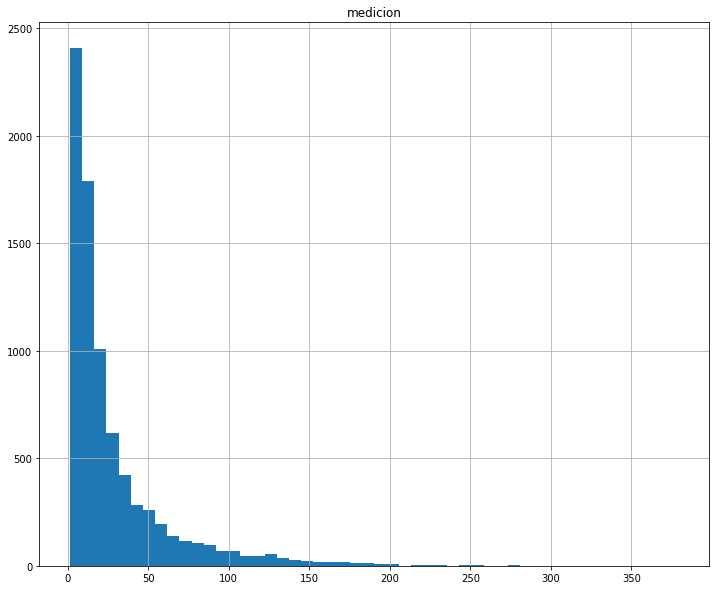

In [19]:
diario_no2.hist(bins=50, figsize=(12,10));

In [20]:
# Medición media anual
diario_no2.resample("Y").mean()

,medicion
fecha,
2001-12-31,57.096068
2002-12-31,43.646110
2003-12-31,42.055632
2004-12-31,47.124690
2005-12-31,43.147353
2006-12-31,37.992130
2007-12-31,37.500623
2008-12-31,30.391584
2009-12-31,28.397910


Vamos a crear una variable de paso de tiempo (*time-step*).

In [23]:
diario_no2["time"] = np.arange(len(diario_no2.index))

diario_no2.head()

,medicion,time
fecha,,
2001-01-01,47.583333,0
2001-01-02,39.000000,1
2001-01-03,53.833333,2
2001-01-04,51.833333,3
2001-01-05,80.083333,4


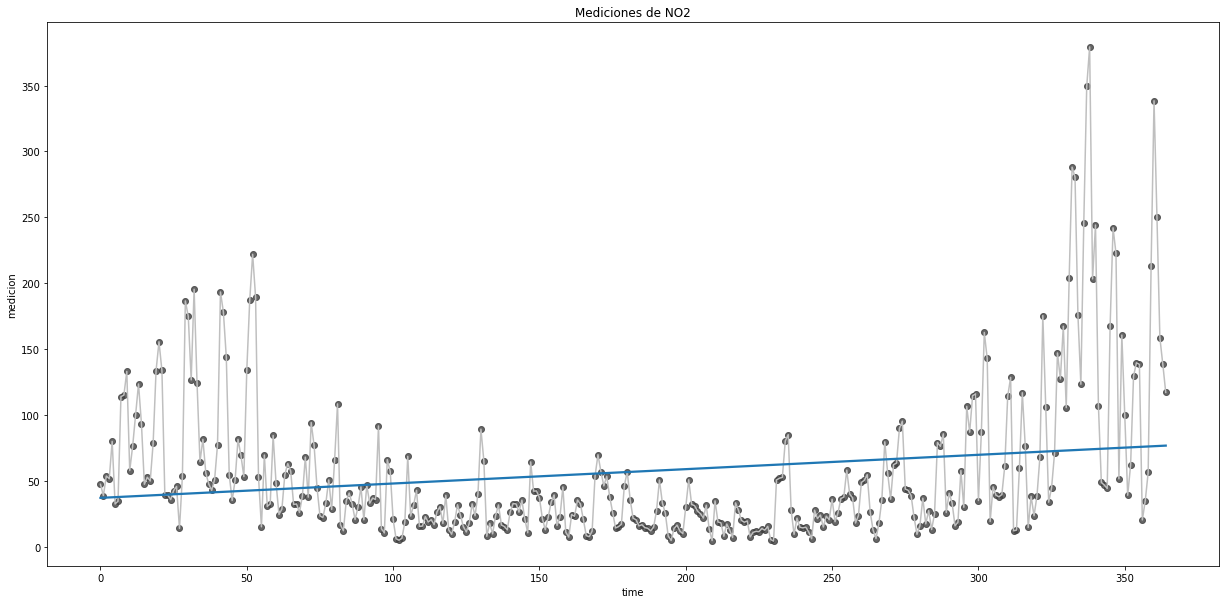

In [24]:
# Mediciones realizadas hasta el año 2001
df = diario_no2[diario_no2.index.year == 2001]

fig, ax = plt.subplots(figsize=(21, 10))
ax.plot("time", "medicion", data=df, color="0.75")
ax = sns.regplot(x="time", y="medicion", data=df, ci=None,
                 scatter_kws=dict(color="0.25"))
ax.set_title("Mediciones de NO2");

Las features de paso de tiempo nos permiten modelar la dependencia del tiempo. Una serie es dependiente del tiempo si sus valores se pueden predecir desde el momento en que ocurrieron. En las series de nuestro ejemplo, podemos predecir que las mediciones de NO2 al final del año son generalmente más altas que las mediciones realizadas durante los meses de mitad de año.

Vamos a creanos una variable *lag*. Las variable de lag nos permiten modelar la dependencia en serie o serial.

In [25]:
diario_no2["Lag_1"] = diario_no2["medicion"].shift(1)
diario_no2.head()

,medicion,time,Lag_1
fecha,,,
2001-01-01,47.583333,0,NaN
2001-01-02,39.000000,1,47.583333
2001-01-03,53.833333,2,39.000000
2001-01-04,51.833333,3,53.833333
2001-01-05,80.083333,4,51.833333


Las variables de lag nos permiten dibujar gráficas donde cada observación en una serie se dibuja contra la observación anterior.

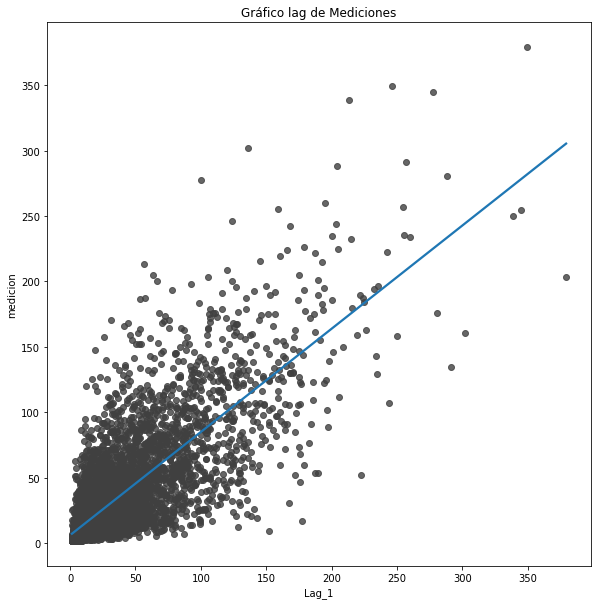

In [26]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.regplot(x="Lag_1", y="medicion", data=diario_no2, ci=None,
                 scatter_kws=dict(color="0.25"))
ax.set_aspect("equal")
ax.set_title("Gráfico lag de Mediciones");

Podemos ver en el gráfico de lag que las mediciones de un día (`medicion`) están correlacionadas con las mediciones del día anterior (`Lag_1`). Cuando vemos una relación como ésta sabemos que una variable de lag será útil.

Una serie temporal tiene dependencia serial cuando una observación se puede predecir a partir de las observaciones previas. En nuestro ejemplo, podemos predecir que mediciones altas en un día, generalmente significan mediciones altas en el siguiente día.